**Notebook content:**
- Explore event names.
- Explore event values.

In [20]:
%reset -f 

In [21]:
import sys
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline

#mine
from myDefs.defs import *

In [22]:
#display settings

from IPython.display import display

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)
#pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.precision = 4

np.set_printoptions(threshold=sys.maxsize) #print the full NumPy array

### **Read events file**

In [23]:
file = DATA_PATH + "parseData0.csv"
df = pd.read_csv(file, sep=',') 

In [24]:
df.shape

(1683616, 18)

In [25]:
df.head()

,pid,admissionId,eventName,eventStartDate,eventEndDate,bValue,dValue,iValue,sValue,eventDesc,unitOfMeasure,orderNumber,organismId,eventCode,eventCodeOrg,eventType,eventTypeOrg,sourceName
0,1.0133e+09,1840641.0,WBC,2018-02-15 10:58:00.0000000,2018-02-15 10:58:00.0000000,False,2.14,0.0,NaN,NaN,K/microL,NaN,NaN,26464-8,100109500,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
1,1.0133e+09,1840641.0,Alkaline Phosphatase -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,False,129.00,0.0,NaN,NaN,IU/l,NaN,NaN,77141-0,100184075,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
2,1.0133e+09,1840641.0,"Protein -Blood, total",2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,False,3.60,0.0,NaN,NaN,g/dl,NaN,NaN,2885-2,100184155,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
3,1.0133e+09,1840641.0,Sodium -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,False,147.00,0.0,NaN,NaN,meq/l,NaN,NaN,2951-2,100184295,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
4,1.0133e+09,1840641.0,Urea -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,False,24.00,0.0,NaN,NaN,mg/dl,NaN,NaN,3091-6,100184520,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]


# Explore Event Names

There are **3,762** unique events names. However, this number does not reflect the real number of unique names, due to duplicates. To find duplicates, we should:

- Find ***synonymous*** names. For exmple: **Pulse** and **"Hr"** (heart rate).
- ***Translate*** names from Hebrew to English. This is especially important when there are events with both an Hebrew name and an English name For example, the event **"דופק"**.
- Find events differ in one or several characters, either due to ***typos*** or due to different use in capitals and lowercases.

This will be done by preparing a file containing all events names (see below), which will be scaned manually, and will be corrected, translated or replaced, by a new name / term, if needed. 


In [26]:
df["eventName"].nunique()

3762

Show examples of events:

In [27]:
df[["eventName"]].drop_duplicates().head(10)

,eventName
0,WBC
1,Alkaline Phosphatase -Blood
2,"Protein -Blood, total"
3,Sodium -Blood
4,Urea -Blood
5,"Calcium -Blood, total"
6,Chloride -Blood
7,SGPT (ALT) -Blood
8,Albumin -Blood
9,Amylase -Blood


### Reduce number of names  

#### Strip names
Strip events names (remove any leading and trailing space characters).
Now there are **3,755** unique event names.

In [28]:
#get event names before  and after stripping  
before_strip = df["eventName"]
after_strip = df["eventName"].str.strip()

#get the dulicate events 
diff = pd.Series(list(set(before_strip) - set(after_strip)))
dup = set(diff.str.strip()) & set(before_strip)

print("After strip:", after_strip.nunique())
print("Num duplicates:", before_strip.nunique() - after_strip.nunique())
print ("Duplicate events:\n")
print(dup)


After strip: 3755
Num duplicates: 7
Duplicate events:

{'DERMATITIS STASIS', 'Vitamin B12', 'NEUTRO%', 'ESR -2h', 'BACTEREMIA', 'ESR -1h', 'WBC'}


In [29]:
#strip events
df["eventName"] = df["eventName"].str.strip()

#### Insensitive case
Capitalize events names (convert the first character in first word to Uppercase). 
Strip events names (any leading and trailing space characters).
Now there are **3,699** unique event names.

In [30]:
#get event names before  and after stripping  
ls = ["nOmi","Nomi","noMi", "hadar", "was"]
before_lower = pd.Series(ls) #df["eventName"]
after_lower = pd.Series(ls).str.lower() #df["eventName"].str.lower()

#get the dulicate events 
diff = pd.Series(list(set(before_lower) - set(after_lower)))
print(diff)
print(diff.str.lower().unique())
dup = set(diff.str.lower()) & set(before_lower)
print()
print("After lower:", after_lower.nunique())
print("Num duplicates:", before_lower.nunique() - after_lower.nunique())
print ("Duplicate events:\n")
print(dup)


0    Nomi
1    noMi
2    nOmi
dtype: object
['nomi']

After lower: 3
Num duplicates: 2
Duplicate events:

set()


In [31]:
def f(x):
    return x.index.to_list()

y = df.groupby(df['eventName'].str.lower()).apply(f)
y = y[y.str.len() > 1]
y

eventName
% albumin                    [353194, 409299, 828995, 1012053, 1365530, 141...
% alpha1                     [353193, 409297, 828994, 1012052, 1365529, 141...
% alpha2                     [353195, 409300, 828996, 1012056, 1365531, 141...
% gamma                      [353196, 409298, 828997, 1012055, 1365533, 141...
% lympho                                                    [1298547, 1301551]
                                                   ...                        
תלונת החולה / תלונה עקרית    [1151, 17045, 28540, 30273, 47201, 47202, 4720...
תפקוד                                         [413785, 414054, 420195, 481257]
תרבית מניקור מותניcsf        [69837, 1355897, 1417189, 1420335, 1427252, 14...
תרגול אקטיבי                                                  [597375, 597387]
תרופות קבועות                                         [13103, 651156, 1306300]
Length: 2954, dtype: object

In [32]:
pd.Series(list(set(pd.Series(['a', 'b', 'c','a']))))

0    b
1    c
2    a
dtype: object

In [33]:
#strip events
df["eventName"] = df["eventName"].str.strip()

### Empty events names

There are **55,458** rows without a name.
- Out of them, **898** don't have sValue/event description. These events corresponds to the type of surgery. 

In [34]:
x = df[df["eventName"].isna()].shape[0]
print ("Num events without a name:", x)

Num events without a name: 55458


In [35]:
#get events without name / sValue / eventDesc
y = df[df["eventName"].isna() & df['sValue'].isna() & df['eventDesc'].isna()]
print ("Num events without a name and without sValue or event description:", y.shape[0])
y.head()

Num events without a name and without sValue or event description: 898


,pid,admissionId,eventName,eventStartDate,eventEndDate,bValue,dValue,iValue,sValue,eventDesc,unitOfMeasure,orderNumber,organismId,eventCode,eventCodeOrg,eventType,eventTypeOrg,sourceName
455,1.7782e+08,1935793.0,NaN,2018-12-09 07:54:27.0000000,2018-12-09 07:54:27.0000000,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37270008,LAPAROSCOPIC,snomed,conv_approach_cham,[MIRROR_Chameleon].[Approach]
2606,6.9680e+08,1841065.0,NaN,2018-02-12 21:55:03.7470000,2018-02-12 21:55:03.7470000,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,129236007,פתוח,snomed,conv_approach_cham,[MIRROR_Chameleon].[Approach]
2677,4.8546e+08,1840978.0,NaN,2018-02-12 18:33:39.0170000,2018-02-12 18:33:39.0170000,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,129236007,פתוח,snomed,conv_approach_cham,[MIRROR_Chameleon].[Approach]
2984,2.3193e+08,1840104.0,NaN,2018-02-07 17:33:53.4230000,2018-02-07 17:33:53.4230000,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37270008,LAPAROSCOPIC,snomed,conv_approach_cham,[MIRROR_Chameleon].[Approach]
4579,3.2398e+08,1947392.0,NaN,2019-02-06 17:56:14.0000000,2019-02-06 17:56:14.0000000,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37270008,LAPAROSCOPIC,snomed,conv_approach_cham,[MIRROR_Chameleon].[Approach]


The value of events without name or sValue or eventDesc is found in column **eventCodeOrg** and is actually the **surgery type**. 

**To do**: check that the type of surgeryis consistent with the type of surgery in the anonymous file.

In [36]:
y['eventCodeOrg'].value_counts()

פתוח            497
LAPAROSCOPIC    397
ניתוח רובוטי      4
Name: eventCodeOrg, dtype: int64

In [37]:
path = EVENTS_INFO_PATH + "NoEventsNames.xlsx"
df[df["eventName"].isna()].to_excel(path, index = False)

# Explore Event Value
### Columns bValue, dValue, iValue, sValue

The value of an event is found in one of the columns dValue / iValue / sValue / bValue.

- **dValue** - decimal value. There are 19,503 unique values.  

- **iValue** - integer value. There are only 11 unique values. The value 0 is probably a default value. 

- **sValue** - text value. There are 1,290 unique values.  

- **bValue** - boolean value. Useless: all is False.

Values can also be in column **EventDesc**.


In [38]:
#iValue
df["iValue"].nunique();
df["iValue"].value_counts()

0.0     1529746
1.0       23480
5.0        1870
2.0         890
3.0         748
4.0          89
9.0          51
10.0         30
8.0          18
7.0           6
11.0          3
Name: iValue, dtype: int64

In [39]:
#dValue
df["dValue"].nunique();
df["dValue"].value_counts()

0.0000         147269
100.0000        30044
99.0000         21970
98.0000         18172
97.0000         15907
                ...  
0.0017              1
730000.0000         1
74.7400             1
47.9600             1
1983.0000           1
Name: dValue, Length: 19503, dtype: int64

In [40]:
#sValue
df["sValue"].value_counts().rename_axis('sValue').reset_index(name='counts')

,sValue,counts
0,חכלג כירור כלל ג' ואונק,9654
1,IV,6351
2,PSIMV,2686
3,1,1820
4,פעיל,926
...,...,...
1285,'חט,1
1286,'Dyslipidemia,1
1287,'2000,1
1288,'ישן,1


In [41]:
#bValue

print("Num unique values in bValue:", df["bValue"].nunique())

#drop column bValue
df.drop(columns=['bValue'], inplace=True)

Num unique values in bValue: 1


### 1) Numeric columns iValue and dValue
First let's examine the numeric values in **iValue** and **dValue**.
- **iValue** - Most values are in range [0,1]. Maximal number is 11.
- **dValue** - Most values are in range [-97,1000]. Maximal number is very big, probably not a number.

In [42]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df[['dValue', 'iValue']].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.99])

,dValue,iValue
count,1556931,1556931
mean,4985,0
std,1326034,0
min,-97,0
10%,0,0
25%,5,0
50%,42,0
75%,98,0
80%,100,0
90%,140,0


#### Histograms of iValue and dValue

Text(0.5, 1.0, 'iValue, q >.99')

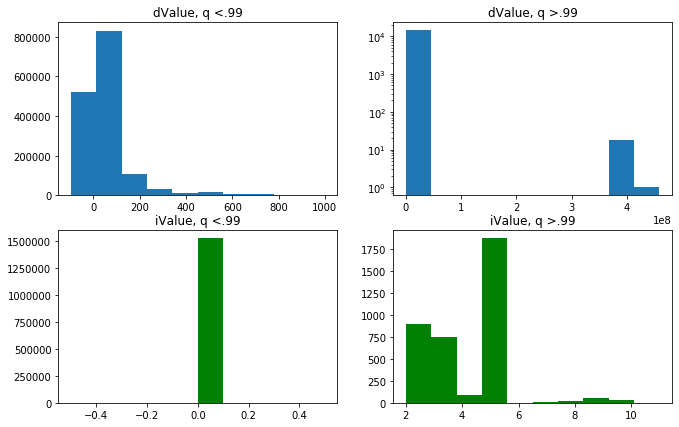

In [43]:
#plot histograms of dValue and iValue

#get values under and above quantile 0.99
q = df['dValue'].quantile(.99)
x1 = df[df['dValue'] < q]['dValue']
x2 = df[df['dValue'] > q]['dValue']
x1.describe();
x2.describe();

#get values under and above quantile 0.99
q = df['iValue'].quantile(.99)
x3 = df[df['iValue'] < q]['iValue']
x4 = df[df['iValue'] > q]['iValue']
x3.describe();
x4.describe();

#plot histograms 
plt.figure(figsize=(11, 7))
plt.subplot(221)
plt.hist(x1)
plt.title("dValue, q <.99")

plt.subplot(222)
plt.hist(x2, log=True)
plt.title("dValue, q >.99")

plt.subplot(223)
plt.hist(x3, color='g')
plt.title("iValue, q <.99")

plt.subplot(224)
plt.hist(x4, color='g')
plt.title("iValue, q >.99")


#### Big values
Big values may be the result of small units, such as **mg**.

In [44]:
#show events with very big values 
df[df['dValue'] > df['dValue'].quantile(.99)]['eventName'].value_counts();

#### The relations between dValue and iValue.
There ane no events where both iValue and dValue are different from 0.

In [45]:
df[ (df["dValue"] != 0) & (df["iValue"] != 0)][["dValue", "iValue"]].any()

dValue    False
iValue    False
dtype: bool

### 2) Textual columns sValue nad eventDesc
Let's examine the text values in **sValue** and **eventDesc**.

- If sValue exists, then eventDesc exists too, but not the opposite. 

In [46]:
#counts of sValue and eventDesc in events without a name
a = df[df["eventName"].isna() & df['sValue'].notna() & df['eventDesc'].notna()].shape[0]
b = df[df["eventName"].isna() & df['sValue'].notna() & df['eventDesc'].isna()].shape[0]
c = df[df["eventName"].isna() & df['sValue'].isna() & df['eventDesc'].notna()].shape[0]
d = df[df["eventName"].isna() & df['sValue'].isna() & df['eventDesc'].isna()].shape[0]

dd = pd.DataFrame({'sValue' : ['+', '+', '-', '-'],
                    'eventDesc' : ['+', '-', '+', '-'],
                    'count' : [a, b, c, d]})

assert(df[df["eventName"].isna()].shape[0] == dd['count'].sum())

print("counts of sValue and eventDesc in events without a name:")
dd

counts of sValue and eventDesc in events without a name:


,sValue,eventDesc,count
0,+,+,1726
1,+,-,0
2,-,+,52834
3,-,-,898


# Process column sValue

In [78]:
df['sValue'] = df.loc[:,'sValue'].str.replace("'", "")

# Create  a file of events and thier values

The file contains the following columns:
- **count** - number of occurrences of event.
- **dValues_description** - description of values in column dValues.
- **iValues_description** - description of values in column iValues.
- **sValue_values** - unique list of values in column sValue.
- **eventDesc_values** - unique list of values in column sValue.
- **unitOfMeasure** - unique list of values in column unitOfMeasure.

File should help us looking closer at each events and understand its values.

In [84]:
#Create a file of events and thier values

def getUniqueList(x):
    #return a unique 
    if not x.any():
        return np.nan
    x.dropna(inplace=True)
    x.sort_values(inplace=True) 
    return list(set(x)) 

def getDescription(x):
    #return a description of the values 
    if x.notna().any():
         
        if x.nunique() == 1:
            return x.min()
        else:
            des = x.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.99])
            return des.to_dict()     

    return np.nan

def createDict(x):
    ls = getUniqueList(x)
    if ls and type(ls) == type([]):
        return {str(item) : "None" for item in ls}
    return np.nan

def diffUnits(x):
    
    if not x.any():
        return np.nan
    x.dropna(inplace=True)
    x.sort_values(inplace=True)
    x = x.str.capitalize()
    ls = list(set(x)) 
    if len(ls) > 1:
        return 1
    else:
        return np.nan
    
    
    
#grouped by eventName events and return all unique values in each value column
grouped = df.groupby('eventName')

aggs = grouped.agg(
    #count number of events
    count = pd.NamedAgg(column='eventName', aggfunc= 'size'),
    
    #get number of unique patients
    nPatients = pd.NamedAgg(column='pid', aggfunc= 'nunique'),
    
    #for numeric values 
    dValues = pd.NamedAgg(column= 'dValue', aggfunc= getDescription),
    iValues = pd.NamedAgg(column= 'iValue', aggfunc= getDescription),
    
    #for text values 
    sValue = pd.NamedAgg(column= 'sValue', aggfunc= getUniqueList),
    eventDesc = pd.NamedAgg(column= 'eventDesc', aggfunc= getUniqueList),
    
    #create dict from sValues
    sValueDict = pd.NamedAgg(column='sValue', aggfunc=createDict),
    
    #get measure 
    unit = pd.NamedAgg(column='unitOfMeasure', aggfunc= getUniqueList),
    
    diffUnits = pd.NamedAgg(column='unitOfMeasure', aggfunc=diffUnits)
)

aggs = aggs.sort_values(by='count', ascending=False).reset_index()

aggs

,eventName,count,nPatients,dValues,iValues,sValue,eventDesc,sValueDict,unit,diffUnits
0,דופק,82256,680,"{'count': 82256.0, 'mean': 85.56524995137133, ...",0,NaN,NaN,NaN,NaN,nan
1,לחץ דם,82194,679,"{'count': 82194.0, 'mean': 95.12156605104995, ...",0,NaN,NaN,NaN,NaN,nan
2,סטורציה,66636,680,"{'count': 66636.0, 'mean': 96.82040518638574, ...",0,NaN,NaN,NaN,NaN,nan
3,חום,38503,680,"{'count': 38503.0, 'mean': 36.841587149053346,...",0,NaN,NaN,NaN,"[C, F]",1
4,HR,36653,47,"{'count': 36653.0, 'mean': 88.27975881919625, ...",0,NaN,NaN,NaN,[bpm],nan
...,...,...,...,...,...,...,...,...,...,...
3750,appendicitis- acute,1,1,0,0,NaN,NaN,NaN,NaN,nan
3751,HEPARIN 25000 units (15units/kg/hour)+SODIUM C...,1,1,50,0,NaN,NaN,NaN,[cc],nan
3752,c-CD22 (early B),1,1,58,0,NaN,NaN,NaN,[%],nan
3753,c-IgG,1,1,18,0,NaN,NaN,NaN,[%],nan


In [85]:
#write to file 
output_path = DATA_PATH + "EventsInfo_not_manual.xlsx"
aggs.to_excel(output_path, index=False, float_format="%.2f" ) #uncomment to write to file 

# Create a file of all words in event names

File should help find events that should be merged.
The structure of the file is as follow:

- First column is a word in en event name. 
- Rest columns are the all the events which contain this word.

In [74]:
#get unique events 
unique_events = df[["eventName"]].drop_duplicates().dropna()["eventName"]

#split each event name to words
splited = unique_events.str.split(r'[\s*,\-,\+,,\,&(),\/,\:,\?,\\,\%,\>,\<,\,\n,\_]')

#get words which thier length > 1 into a flatten list
flat_list = [s for row in splited for s in row if len(s) > 1]

#get only unique words    
unique_words = list(set(flat_list)) 

unique_words;

In [67]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)


#remove words in length < 2, and remove numbers
filtered = [word for word in unique_words if len(word) > 1 and not is_number(word)]  

print("Estimated number of unique words in event names:", len(filtered))


Estimated number of unique words in event names: 2990


In [68]:
#for each unique word (length > 1) get all events it appears in 
d = {word : 
     unique_events[unique_events.str.contains(word, regex=False, case=False, na=False)].values
     for word in filtered} 

words_df = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in d.items() ])).T

In [69]:

words_df.sort_index(inplace = True)

words_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083
.Lipemia,.Lipemia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0005cc,REMIFentaNIL HCL 5000 mcg+SODIUM CHLORIDE 0.9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01IU,VASOPRESSIN 20 IU (0.01IU/min)+SODIUM CHLORID...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01mg,MIDAZOLAM 50 mg (0.01mg)+SODIUM CHLORIDE 0.9%...,MIDAZOLAM 50 mg (0.01mg/kg)+SODIUM CHLORIDE 0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02IU,VASOPRESSIN 20 IU (0.02IU/min)+SODIUM CHLORID...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#write output

output_path = "{}events_names_splitted.xlsx".format(DATA_PATH)

#words_df.to_excel(output_path) #uncomment to write to file

# Num evnets per patient

There are **233** events with more than 680 (= number of patients) occurrences

In [71]:
#count values again
events_counts = df["eventName"].value_counts().sort_values(ascending=False)

nPatients = df["pid"].nunique()
nEvents = events_counts[events_counts > nPatients/2].shape[0]
nEvents

231

Text(0.5, 1.0, 'Num occurrences of the 231 most common events')

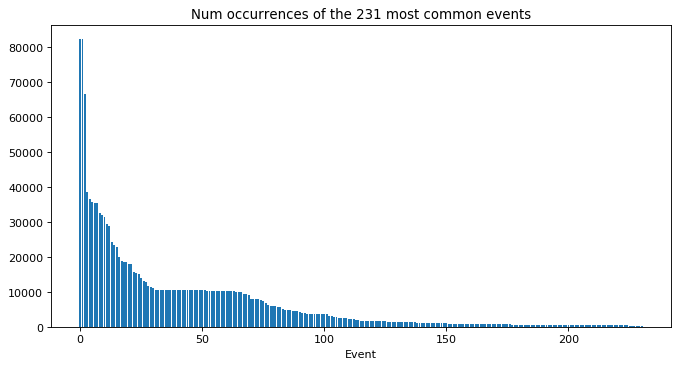

In [72]:
#create a bar plot of num occurrences of most frequent events
events_counts = events_counts[:nEvents]
x = range(events_counts.shape[0])
y = events_counts.values

figure(num=None, figsize=(10, 5), dpi=80)

plt.bar(x, y, align='center')
plt.xlabel('Event')
plt.title('Num occurrences of the {} most common events'.format(nEvents))
#plt.yscale('log')


# Write output


In [81]:
#output into one file 
output_path = "{}parseData1.csv".format(DATA_PATH)
df.to_csv(output_path, sep=',', index=False)